# **Homework 1 - Image Colorization**

<div style="border: 3px solid #222; padding: 16px; border-radius: 10px; background-color: #1c1f26; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #e0e0e0;">
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 12px;">
    <span style="font-size: 24px; color: #ff5555;">&#128274;</span>
    <span style="font-size: 16px;"><strong>Project:</strong> Homeworks</span>
  </div>
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 8px;">
    <span style="font-size: 20px; color: #ff5555;">&#128218;</span>
    <span style="font-size: 16px;"><strong>Course:</strong> Deep Network Development</span>
  </div>
  <div style="margin-top: 12px; font-size: 14px;">
    <span style="font-size: 18px; color: #6e8192;">&#128100;</span>
    <span style="font-weight: bold;"><strong>Authors:</strong></span> Tamás Takács, Imre Molnár (PhD students, Department of Artificial Intelligence, Eötvös Loránd University)
  </div>
</div>
<hr style="border: none; border-top: 2px solid #444;">
<br>

<img src="https://learnopencv.com/wp-content/uploads/2018/07/colorization-example.png" alt="1" border="0">

This notebook contains the required task for the **first homework** of the **Deep Network Development (DNDEG)** course. Read the task description carefully and **fill in the empty code cells**.

# **Task Description**

`Image Colorization` is the process of converting a grayscale image (single-channel) into an image with a specific color spectrum. In this homework, your task is to **create and train a convolutional neural network (CNN) model** to colorize grayscale images to the RGB color spectrum. To demonstrate the effectiveness of CNNs, you will also implement a **linear regression model** for the same task and compare their results.

## **Expectations**

- The **performance does not need to be perfect**, but your **metrics should show better results than random color guessing**, and the **loss should decrease throughout the epochs**.
- You are **free to design any custom shallow convolutional neural network**, as long as it is specifically tailored for the image colorization task.
- You can choose **any dataset** (e.g., `CIFAR-10`, `Caltech101`, `Food101`, `FlickR`) or create a custom dataset by **scraping the web** for a specific theme. If you decide to use web scraping, you can utilize the `icrawler` Python package. Ensure that **no NSFW images** are included.
- If you decide to use a **high-resolution dataset**, apply **resizizing transformations** since the fully connected network’s complexity increases with input size. For example:
  - A $[1\times32\times32]$ grayscale image will have $1,024$ features.
  - A $[1\times512\times512]$ grayscale image will have $262,144$ features, which is $256$ **times more**.
  
## **Requirements**

- Data Visualization:
  - Display **samples from the original dataset**.
  - Show the **transformed grayscale images** at the beginning of the notebook.
  - Present **predicted colorized images** alongside ground truth images.

- Performance Monitoring:
  - **Visualize training and validation losses** after training the network.
  - **Use plots and metrics (e.g., matplotlib, seaborn)** to display performance trends.

- Implement **overfitting prevention techniques**, such as:
  - **Early stopping**
  - **Regularization techniques**
  - **Experimenting with different loss functions**
  - Save the **best-performing model** during training.

- Compare model performance:
  - **Visualize predictions** on a batch of test images.
  - Calculate and display **batch losses for both FCN and CNN models**.
  - Explain why the models perform as they do, **highlighting the strengths and weaknesses** of each approach.

- Visualizing:
  - **Feature Maps** of the CNN model
  - **Weights** of the FCN model

- Optionally, use **WandB (Weights and Biases)** or **TensorBoard** to:
  - Track and visualize **training progress**.
  - Monitor **model performance** over time.
  - Log **key metrics**.

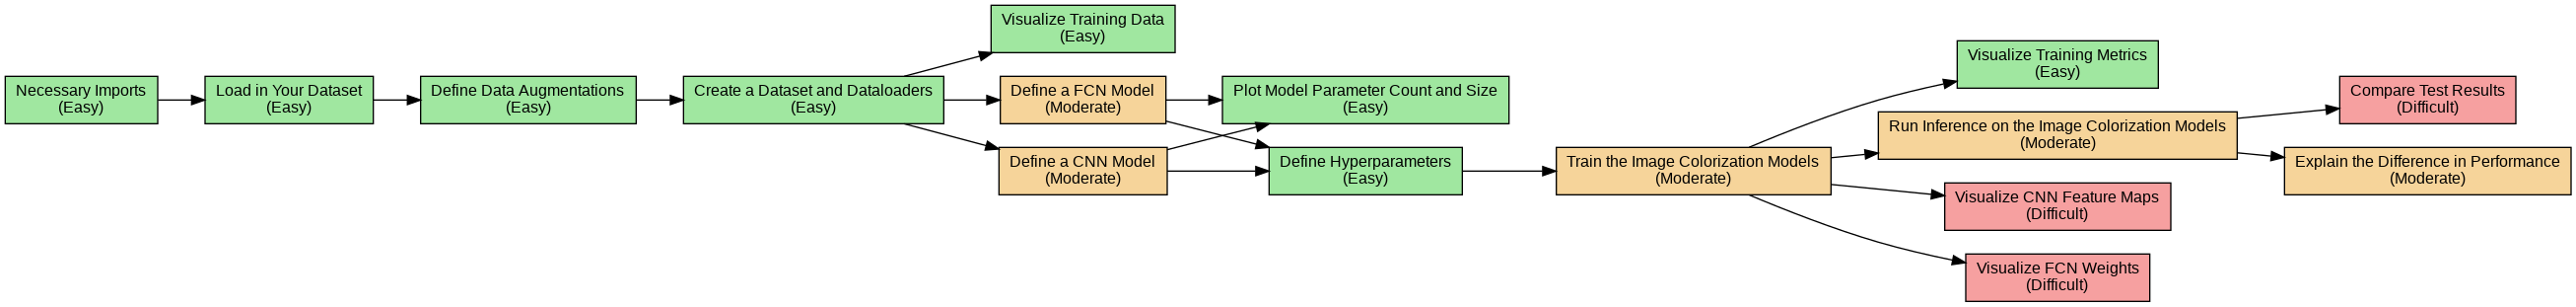

In [1]:
# @title Image Colorization Tasks
# %%capture flowchart_output
# HIDDEN CELL
from graphviz import Digraph
from IPython.display import Image as IMG

def create_flowchart(output_filename='flowchart'):
    dot = Digraph(name='Simplified Object Detection', format='png')
    dot.attr(rankdir='LR')
    dot.attr('node', shape='box', style='filled', fontsize='12', fontname='Arial')

    dot.node('Imports', 'Necessary Imports\n(Easy)', fillcolor='#A0E7A0')
    dot.node('LoadData', 'Load in Your Dataset\n(Easy)', fillcolor='#A0E7A0')
    dot.node('AugmentData', 'Define Data Augmentations\n(Easy)', fillcolor='#A0E7A0')
    dot.node('DatasetDataloader', 'Create a Dataset and Dataloaders\n(Easy)', fillcolor='#A0E7A0')
    dot.node('VisualizeSample', 'Visualize Training Data\n(Easy)', fillcolor='#A0E7A0')
    dot.node('CreateCNN', 'Define a CNN Model\n(Moderate)', fillcolor='#F6D49A')
    dot.node('CreateFCN', 'Define a FCN Model\n(Moderate)', fillcolor='#F6D49A')

    dot.node('TorchSummary', 'Plot Model Parameter Count and Size\n(Easy)', fillcolor='#A0E7A0')
    dot.node('Hyperparameters', 'Define Hyperparameters\n(Easy)', fillcolor='#A0E7A0')

    dot.node('TrainModel', 'Train the Image Colorization Models\n(Moderate)', fillcolor='#F6D49A')

    dot.node('VisualizeTrain', 'Visualize Training Metrics\n(Easy)', fillcolor='#A0E7A0')

    dot.node('RunInference', 'Run Inference on the Image Colorization Models\n(Moderate)', fillcolor='#F6D49A')

    dot.node('CompareResults', 'Compare Test Results\n(Difficult)', fillcolor='#F6A0A0')
    dot.node('ExplainResults', 'Explain the Difference in Performance\n(Moderate)', fillcolor='#F6D49A')

    dot.node('VisualizeFM', 'Visualize CNN Feature Maps\n(Difficult)', fillcolor='#F6A0A0')
    dot.node('VisualizeW', 'Visualize FCN Weights\n(Difficult)', fillcolor='#F6A0A0')

    # Edges
    dot.edge('Imports', 'LoadData')
    dot.edge('LoadData', 'AugmentData')

    dot.edge('AugmentData', 'DatasetDataloader')
    dot.edge('DatasetDataloader', 'CreateCNN')
    dot.edge('DatasetDataloader', 'VisualizeSample')
    dot.edge('DatasetDataloader', 'CreateFCN')

    dot.edge('CreateCNN', 'TorchSummary')
    dot.edge('CreateFCN', 'TorchSummary')
    dot.edge('CreateCNN', 'Hyperparameters')

    dot.edge('CreateFCN', 'Hyperparameters')
    dot.edge('Hyperparameters', 'TrainModel')

    dot.edge('TrainModel', 'VisualizeTrain')
    dot.edge('TrainModel', 'RunInference')
    dot.edge('TrainModel', 'VisualizeFM')
    dot.edge('TrainModel', 'VisualizeW')
    dot.edge('RunInference', 'CompareResults')
    dot.edge('RunInference', 'ExplainResults')

    dot.render(output_filename, view=False)

create_flowchart('homework1_flowchart')
IMG('homework1_flowchart.png')

Each section of the Notebook will guide you through the task:
- `necessary imports`
- `data loading process`
- `defining data augmentations`
- `creating a dataset and dataloaders`
- `visualizing the training data`
- `creating a CNN model`
- `creating a FCN model`
- `defining a loss function and an optimizer`
- `creating a training and validation loop`
- `testing the models`
- `comparing results`
- `visualizing weights and feature maps`

The sections are there to guide you but you **do not have to follow them strictly**.

Copy this notebook to your drive (`File -> Save a copy in Drive`), edit it, and upload the final `.ipynb` file to [Canvas](https://canvas.elte.hu). If you are using this in **Google Colab**, save it as `.ipynb` and upload it, or share the public link. If you have your own machine with Jupyter installed, you can work there as well, as long as you save and upload the `.ipynb` file.

## **General Rules**
Please check all the requirements listed on **Canvas**, but here are some general rules:

- **No NSFW, inappropriate, offensive, or negative images**. Be creative or use your hobbies as inspiration.
- The model is **not expected to achieve high performance** but must perform better than random color guessing.
- Copying others' code will make you fail the assignment automatically, resulting in a **0**.
- Not submitting anything results in a **0**.
- Submitting something, as long as it is not an empty notebook, might result in a 1.
- **Deadline is October 21st Tuesday 11:59 PM** (strict, no late submission)
- Feel free to add more code cells as needed. But don't put code into external Python files.
- Please add your `name` and `Neptun ID` below.

`Good luck!`

## **Guidelines**
Please carefully read each cell of the notebook, as they contain guidelines to help you complete the assignments. While you don't have to follow them strictly, we believe that they provide enough help.

**Name:** Matilda Migwi

**Neptun ID:** H4S9UN

## **0. Necessary Imports**
Import all the necessary packages for this assignment. **ONLY PYTORCH MODELS ARE ACCEPTED!**

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

## **1. Data Loading Process**

If you're unsure which dataset to use, **PyTorch** provides a collection of **pre-built datasets** in its [documentation](https://pytorch.org/vision/main/datasets.html). Look for a dataset under the *Image Classification* section that contains colored images.

**Caltech-101:**

<img src=" https://datasets.activeloop.ai/wp-content/uploads/2022/09/Caltech-101-dataset-main-image.webp" alt="1" border="0">

**CIFAR-10:**

<img src=" https://datasets.activeloop.ai/wp-content/uploads/2022/09/CIFAR-10-dataset-Activeloop-Platform-visualization-image-1.webp" alt="1" border="0">

**Food-101:**

<img src=" https://storage.googleapis.com/kaggle-datasets-images/2918922/5029790/277a9147ec4854e4762767c8bd107bec/dataset-card.png?t=2023-02-20-08-37-14" alt="1" border="0">




## **2. Defining Augmentations**

Since most datasets and images are in RGB color space, you'll need to convert them to grayscale. However, we **strongly recommend** against applying the grayscale transformation immediately after loading the dataset, as this would result in losing the original colored images (which serve as the target). Instead, apply essential preprocessing steps like `tensor conversion`, `normalization` and `resizing` first, and **only perform the grayscale transformation within the custom Dataset class** to retain access to both input (grayscale) and target (RGB) images.

```python
train_transforms = transforms.Compose([
            # Add Augmentations
])

test_transforms = transforms.Compose([
            # Add Augmentations
])
```

In [3]:
# ADD YOUR CODE HERE
# for the purpose of image colorization in CIFAR 10, only relevant data augmentations and preprocessing are necessary
from torchvision import transforms, datasets

train_transforms = transforms.Compose([
            # Add Augmentations
            transforms.RandomHorizontalFlip(0.5),
            transforms.RandomCrop(32, padding=4),
            transforms.RandomRotation(10),
            transforms.GaussianBlur(kernel_size=5, sigma=(0.1, 2.0)),
            transforms.ColorJitter(brightness=0.2, contrast=0.2),
            transforms.ToTensor(), # Move ToTensor before Normalize
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
'''
Where:
RandomHOrizontalFlip to make the model learn mirror invariance of the same image and categorize as one image
RandomCrop at 4 pixels to ensure image is retained and force the model to learn image features
RandomRotation at 10 degrees to teach the model to learn even in certain changes
GaussianBlur to generalize instead of image memorization (overfitting)
ColorJitter to teach the model to learn even in certain lighting changes
Normalization is a preprocessing technique to scale both input and target. Center pixels
ToTensor to convert the images into tensors(matrixes for CNN learning).
'''

test_transforms = transforms.Compose([
            # Add Augmentations
            transforms.RandomRotation(10),
            transforms.ColorJitter(brightness=0.2, contrast=0.2),
            transforms.ToTensor(), # Move ToTensor before Normalize
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

## **3. Creating Datasets and Dataloaders**

To train a custom object detection model, a dataset is required. For this assignment, you will create a **custom dataset class** that takes a dataset path as input and returns **input-output** image pairs when batched through a `Dataloader`:

- **Input:** $[1\times H \times W]$ grayscale image  
- **Output:** $[3\times H \times W]$ RGB image  

Use the built-in **`transforms.Grayscale`** method from `torchvision.transforms` to convert images to grayscale.

> **Note:** The $W$ and $H$ dimensions do not necessarily have to be the same.

For the **DataLoader**, ensure that the **batch size** is appropriate so that it fits into memory. Set the **`shuffle`** parameter as follows:

- **Training & Validation DataLoaders:** `shuffle=True` (to randomize the order of samples)  
- **Test DataLoader:** `shuffle=False` (to maintain consistency in evaluation)

```python
class GrayscaleToColorDataset(Dataset):
    def __init__(self):
        raise NotImplementedError
    
    def __len__(self):
        raise NotImplementedError

    def __getitem__(self, idx):
        raise NotImplementedError
```

In [4]:
# ADD YOUR CODE HERE
# to grayscale already colorized images for image colorization later
class GrayscaleToColorDataset(Dataset):
    def __init__(self, original):
      # Start by importing the original dataset for we need a pair of the original and the grayscaled dataset
        self.original = original
      # Grayscaling the original images from RGB which automatically has 3 channels to Grayscale with only one channel
        self.GrayscaleTransform = transforms.Grayscale(num_output_channels=1)

    def __len__(self):
        # Here we just check the length of the original dataset
        return len(self.original)

    def __getitem__(self, idx):
      # Here, we access each RGB image using idx, and grayscaling it
        colored_image, _ = self.original[idx] # we are not interested in anything else, just the colored_images
        grayscale_image = self.GrayscaleTransform(colored_image)

        return grayscale_image, colored_image

In [5]:
# With datasets, We must make the dataloader now.
# First import CIFAR 10 training and test model
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transforms)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transforms)

# Next, we split the train set to train and validation set, for we need the validation set to fine tune hyperparameters that will be used in the test set
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [
    int(0.8 * len(train_dataset)),
    len(train_dataset) - int(0.8 * len(train_dataset))
])

# print the shapes to just get an idea of what we have so far
print("Train Dataset Shape:", len(train_dataset))
print("Validation Dataset Shape:", len(val_dataset))
print("Test Dataset Shape:", len(test_dataset))

# now imtroducing the dataloader for grayscaled data
train_loader = DataLoader(GrayscaleToColorDataset(train_dataset), batch_size=32, shuffle=True)
val_loader = DataLoader(GrayscaleToColorDataset(val_dataset), batch_size=32, shuffle=False)
test_loader = DataLoader(GrayscaleToColorDataset(test_dataset), batch_size=32, shuffle=False)

100%|██████████| 170M/170M [00:13<00:00, 12.3MB/s]


Train Dataset Shape: 40000
Validation Dataset Shape: 10000
Test Dataset Shape: 10000


## **4.1 Visualize Training Data**

To visualize the training data, extract a batch from the training `DataLoader` and plot the **input-output** pairs using `Matplotlib` or `Seaborn`. Ensure that at least **8 pairs** are displayed for a clear representation.

```python
def visualize_batch():
  raise NotImplementedError
```

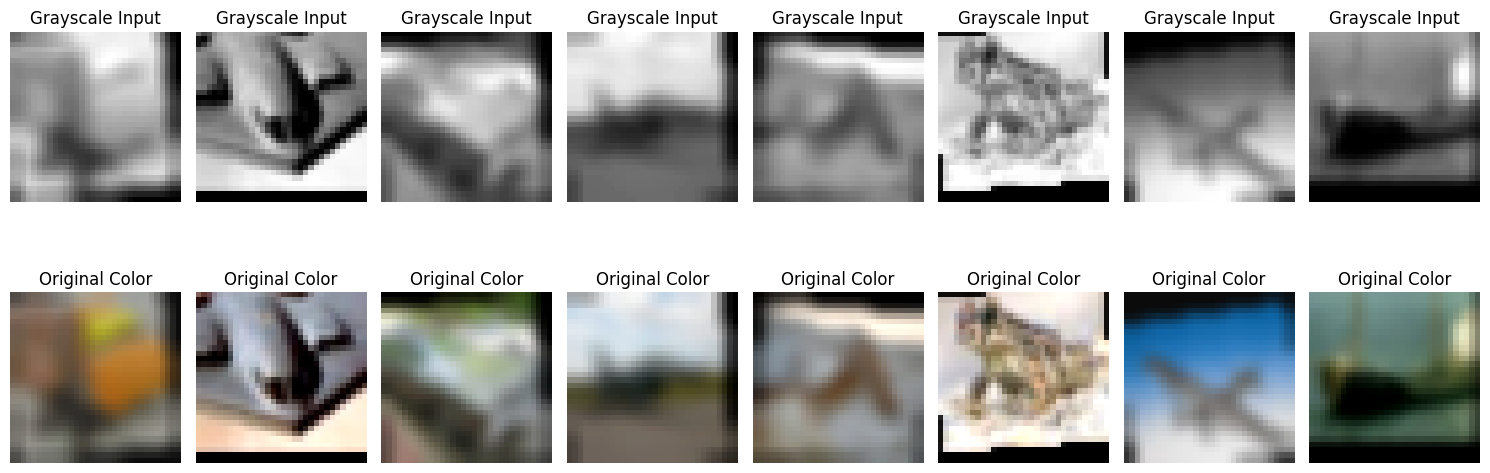

In [6]:
def visualize_batch():
    # Get a batch of training data
    grayscale_images, colored_images = next(iter(train_loader))

    # Ensure we display at most 8 pairs
    num_images = min(len(grayscale_images), 8)

    # Denormalize function (assuming mean 0.5 and std 0.5 used in transforms)
    def denormalize(tensor):
        return tensor * 0.5 + 0.5

    plt.figure(figsize=(15, 6))
    for i in range(num_images):
        # Grayscale Image
        plt.subplot(2, num_images, i + 1)
        # Remove the channel dimension for displaying grayscale
        plt.imshow(grayscale_images[i].squeeze(0), cmap='gray')
        plt.title("Grayscale Input")
        plt.axis("off")

        # Original Colored Image
        plt.subplot(2, num_images, i + num_images + 1)
        # Permute dimensions from (C, H, W) to (H, W, C) for displaying RGB and denormalize
        plt.imshow(denormalize(colored_images[i].permute(1, 2, 0)))
        plt.title("Original Color")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Visualize a batch
visualize_batch()

## **4.2 Creating a CNN Model**

You are free to design your CNN using any combination of:
- `Conv2d` layers
- `MaxPool2d`
- Normalization techniques (e.g., `BatchNorm`, `Dropout`)
- Activation functions (e.g., `ReLU`, `LeakyReLU`, etc.)

The final convolutional layer should output a tensor of shape $[3 × H × W]$ to match the RGB color space. Apply a `sigmoid` activation at the end to constrain the output values between **0 and 1**, allowing for later **denormalization** to the full RGB scale.

For an **extra grade improvement**, explore more advanced architectures and techniques:

- **Dilation in Conv2D layers:** Expands the receptive field without increasing parameters.  
  [PyTorch Docs on Conv2D](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)  

- **Transpose Convolutions:** Used for upsampling to restore spatial dimensions in an image.  
  [PyTorch Docs on ConvTranspose2d](https://pytorch.org/docs/stable/generated/torch.nn.ConvTranspose2d.html)  

- **Encoder-Decoder Models & UNets:** Popular in segmentation and image-to-image translation tasks.  
  [Understanding UNet](https://towardsdatascience.com/understanding-u-net-61276b10f360/)  

- **Generative Adversarial Networks (GANs):** Used for high-quality image generation and colorization.  
  [Introduction to GANs](https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/)  

```python
class ColorizationCNN(nn.Module):
    def __init__(self):
        super(ColorizationCNN, self).__init__()
        raise NotImplementedError

    def forward(self, x):
        raise NotImplementedError
```

In [7]:
'''Since our images are low quality and do not require alot, since we are performing
a basic transfer learning, I think making a shallow Unet model will do. Unet models
imvolve:
1. An encoder for feature extraction,
2. Bottleneck for feature and size preservation,
3. Decoder for upsampling and feature transfer and
4. Skip functions to avoid vanishing gradient.
'''
class ColorizationCNN(nn.Module):
  def __init__(self):
    super(ColorizationCNN, self).__init__()
    # Encoder
    self.encoder1 = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=3, padding=1), # Reduced filters
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.BatchNorm2d(32),) # Reduced filters

    self.encoder2 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=3, padding=1), # Reduced filters
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.BatchNorm2d(64),) # Reduced filters

    self.encoder3 = nn.Sequential(
        nn.Conv2d(64, 128, kernel_size=3, padding=1), # Reduced filters
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.BatchNorm2d(128),) # Reduced filters

    # Added another encoder block
    self.encoder4 = nn.Sequential(
        nn.Conv2d(128, 256, kernel_size=3, padding=1), # Reduced filters
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.BatchNorm2d(256),
    ) # Reduced filters

    # Bottleneck
    self.Bottleneck = nn.Sequential(
        nn.Conv2d(256, 256, kernel_size=3, padding=1), # Reduced filters
        nn.ReLU(inplace=True),
        nn.BatchNorm2d(256),
    ) # Reduced filters

    # Decoder
    # Adjusted ConvTranspose2d to match spatial dimensions for skip connection
    self.decoder1 = nn.Sequential(
        nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2), # Upsample from 2x2 to 4x4, Reduced filters
        nn.ReLU(inplace=True),
        nn.BatchNorm2d(128),
    ) # Reduced filters

    self.decoder2 = nn.Sequential(
        nn.ConvTranspose2d(128 + 128, 64, kernel_size=2, stride=2), # Upsample from 4x4 to 8x8, Adjusted input channels and reduced filters
        nn.ReLU(inplace=True),
        nn.BatchNorm2d(64),
    ) # Reduced filters

    self.decoder3 = nn.Sequential(
        nn.ConvTranspose2d(64 + 64, 32, kernel_size=2, stride=2), # Upsample from 8x8 to 16x16, Adjusted input channels and reduced filters
        nn.ReLU(inplace=True),
        nn.BatchNorm2d(32),
    ) # Reduced filters

    # Added another decoder block for upsampling to 32x32
    self.decoder4 = nn.Sequential(
        nn.ConvTranspose2d(32 + 32, 16, kernel_size=2, stride=2), # Upsample from 16x16 to 32x32, Adjusted input channels and reduced filters
        nn.ReLU(inplace=True),
        nn.BatchNorm2d(16),
    ) # Reduced filters

    # Final convolutional layer to get 3 output channels
    self.final_conv = nn.Sequential(
        nn.Conv2d(16, 3, kernel_size=3, padding=1), # Adjusted input channels to match decodered4 output channels
        nn.Sigmoid(),
    )


  def forward(self, x):
    # Encoder
    encodered1 = self.encoder1(x)
    encodered2 = self.encoder2(encodered1)
    encodered3 = self.encoder3(encodered2)
    encodered4 = self.encoder4(encodered3)

    # Bottleneck
    bottleneck = self.Bottleneck(encodered4)

    # Decoder
    decodered1 = self.decoder1(bottleneck)

    # Skip connection 1: Concatenate decoder1 output with encoder3 output
    skip1 = torch.cat((decodered1, encodered3), dim=1)

    decodered2 = self.decoder2(skip1)

    # Skip connection 2: Concatenate decoder2 output with encoder2 output
    skip2 = torch.cat((decodered2, encodered2), dim=1)

    decodered3 = self.decoder3(skip2)

    # Skip connection 3: Concatenate decoder3 output with encoder1 output
    skip3 = torch.cat((decodered3, encodered1), dim=1)

    decodered4 = self.decoder4(skip3)

    # Pass the output of the final decoder layer to the final convolutional layer
    x = self.final_conv(decodered4)

    return x

In [8]:
# to test the function above for any mismatch on CIFAR 10 train
model = ColorizationCNN().to(device)
summary(model, input_size = (1, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             320
              ReLU-2           [-1, 32, 32, 32]               0
         MaxPool2d-3           [-1, 32, 16, 16]               0
       BatchNorm2d-4           [-1, 32, 16, 16]              64
            Conv2d-5           [-1, 64, 16, 16]          18,496
              ReLU-6           [-1, 64, 16, 16]               0
         MaxPool2d-7             [-1, 64, 8, 8]               0
       BatchNorm2d-8             [-1, 64, 8, 8]             128
            Conv2d-9            [-1, 128, 8, 8]          73,856
             ReLU-10            [-1, 128, 8, 8]               0
        MaxPool2d-11            [-1, 128, 4, 4]               0
      BatchNorm2d-12            [-1, 128, 4, 4]             256
           Conv2d-13            [-1, 256, 4, 4]         295,168
             ReLU-14            [-1, 25

## **4.3 Creating a FCN Model**

The fully connected network should process an **input grayscale image** and transform it into an RGB image by following these steps:

1. **Flatten the input:**  
   - Convert the image into a vector of shape $[N, 1 * H * W]$, where $N$ is the batch size.
   
2. **Linear Projection:**  
   - Apply a **fully connected (linear) layer** that projects the input vector to a space of $[N, 3 * H * W]$.

3. **Reshape the output:**  
   - Reshape the result back into an image format with shape $[N, 3, H, W]$, matching the expected RGB output.

Feel free to add **more hidden layers** and incorporate **non-linear activation functions**, normalization techniques, and other enhancements to help the model learn more expressive and complex features.

```python
class ColorizationLinear(nn.Module):
    def __init__(self):
        super(ColorizationLinear, self).__init__()
        raise NotImplementedError

    def forward(self, x):
        raise NotImplementedError
```

In [9]:
# Here we implement a fully connected model with flattening function at the last two convolutions
class ColorizationLinear(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ColorizationLinear, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 512), # First hidden layer
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(512),
            nn.Linear(512, 1024), # Second hidden layer
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(1024),
            nn.Linear(1024, output_dim) # Output layer
        )
        self.output_dim = output_dim

    def forward(self, x):
        # Flatten the input image
        x = x.view(x.size(0), -1)

        # Apply the fully connected layers
        x = self.fc(x)

        # Reshape the output back to image format (batch_size, channels, height, width)
        # Assuming output_dim is 3 * H * W
        batch_size = x.size(0)
        # Calculate H and W from the output_dim
        # Assuming the output image is square and has 3 channels
        hw = self.output_dim // 3
        h = w = int(hw**0.5)
        x = x.view(batch_size, 3, h, w)

        # Apply sigmoid to constrain values between 0 and 1
        x = torch.sigmoid(x)

        return x

In [10]:
model_FCN = ColorizationLinear(1024, 3072).to(device)
summary(model_FCN, input_size = (1, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         524,800
              ReLU-2                  [-1, 512]               0
       BatchNorm1d-3                  [-1, 512]           1,024
            Linear-4                 [-1, 1024]         525,312
              ReLU-5                 [-1, 1024]               0
       BatchNorm1d-6                 [-1, 1024]           2,048
            Linear-7                 [-1, 3072]       3,148,800
Total params: 4,201,984
Trainable params: 4,201,984
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 16.03
Estimated Total Size (MB): 16.09
----------------------------------------------------------------


## **5.1 Plotting Model Parameter Count and Size**

A convenient way to inspect the number of parameters in a defined `nn.Module` is by using the `torchsummary` package. This package provides a detailed summary of the model architecture, including the number of parameters in each layer, their shapes, and the total parameter count.

To use `torchsummary`, you need to pass a dummy tensor with the specified input shape. The package will then traverse the model, layer by layer, calculating the total number of trainable and non-trainable parameters while also displaying the output shapes at each stage.

Sumnmarize **both models**!

```python
model_cnn = ColorizationCNN().to(device)
summary(model_cnn, input_size = )
```

## **5.2 Defining Loss Function and Optimizer**

**Loss Functions and their options:**

For our grayscale-to-color image translation task, we are performing **regression** rather than classification. Our network predicts continuous RGB values for each pixel, meaning that the chosen loss function should effectively measure the difference between the predicted and true color values.

---

### **a. Mean Squared Error (MSE) Loss**
MSE loss is a standard choice for regression tasks as it penalizes larger errors more strongly than smaller ones. It is computed as:

$$
\mathcal{L}_{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

where $ y_i $ is the ground truth pixel value and $ \hat{y}_i $ is the predicted pixel value.

- **Pros:** Simple, commonly used for regression, computationally efficient.
- **Cons:** Sensitive to outliers since it squares errors.

---

### **b. Root Mean Squared Error (RMSE) Loss**
RMSE is simply the square root of MSE, reducing the impact of squared errors and providing a more interpretable loss value in the same unit as the output.

$$
\mathcal{L}_{RMSE} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2}
$$

- **Pros:** Less sensitive to large errors compared to MSE, more interpretable.
- **Cons:** Still punishes large errors significantly.

---

### **c. Huber Loss**
Huber Loss is a combination of MSE and Mean Absolute Error (MAE) that is more robust to outliers. It applies MSE for small errors and MAE for large ones:

$$
\mathcal{L}_{Huber} =
\begin{cases}
\frac{1}{2} (y_i - \hat{y}_i)^2, & \text{if} \ |y_i - \hat{y}_i| \leq \delta \\
\delta (|y_i - \hat{y}_i| - \frac{1}{2} \delta), & \text{otherwise}
\end{cases}
$$

where $ \delta $ is a threshold defining the transition from quadratic to linear loss.

- **Pros:** Robust to outliers while still penalizing significant errors.
- **Cons:** Introduces an extra hyperparameter $ \delta $ that must be tuned.

---

### **d. Structural Similarity Index (SSIM) Loss (Advanced)**
While MSE and Huber loss work on a per-pixel basis, SSIM measures **perceptual similarity** between two images. It compares contrast, structure, and luminance.

$$
\mathcal{L}_{SSIM} = 1 - SSIM(y, \hat{y})
$$

where SSIM measures image similarity in a windowed manner.

- **Pros:** Better reflects human perception of image quality.
- **Cons:** More computationally expensive.

---

[PyTorch Documentation](https://pytorch.org/docs/stable/nn.html#loss-functions)

---

**Optimizers and their options:**

There are some pre-built [Optimizers in PyTorch](https://pytorch.org/docs/stable/optim.html), they are sufficient in most cases, especially if their parameters are well set. The two most well-known are Adam (AdamW) and SGD, both of which originate from Gradient Descent, which we implemented earlier.

* **S**tochastic **G**radient **D**escent ([SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html))
* **ADA**ptive **M**oment optimizer ([ADAM](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html))
* [A good general overview](https://www.ruder.io/optimizing-gradient-descent/)

In [13]:
# Using Huber loss and Adaptive Moment Optimizer
loss_fn = nn.HuberLoss(delta=1.0) # Using Huber Loss with delta=1.0
optimizer = torch.optim.Adam # Define optimizer here, but pass model parameters later

**Here's why using Huber Loss over MSE makes sense:**

1. **MSE's Sensitivity to Errors:** MSE penalizes squared errors, which means even small differences between predicted and actual pixel values can contribute significantly to the loss, and larger differences are penalized very heavily.
2. **Huber Loss's Robustness:** Huber loss is less sensitive to large errors by switching to a linear penalty beyond the delta threshold.
3. **Low Resolution and "Outliers":** In low-resolution images like CIFAR-10, the pixel values might have more abrupt changes or less smooth transitions between colors compared to high-resolution images. MSE might treat these more aggressively as "outliers" and penalize them heavily, potentially hindering stable learning. Huber loss, being more robust, would be less affected by these.

## **6. Training the Image Colorization Models**

When implementing the training loop, ensure the following key aspects are included:

- Set an **appropriate number of epochs** for model training, balancing between underfitting and overfitting.
- Maintain running losses throughout each epoch and compute both **training loss** and **validation loss** per epoch.
- Implement an **early stopping mechanism** to halt training if validation loss stops improving, preventing unnecessary overfitting.
- **Save the model at its best-performing epoch** based on validation loss, ensuring the best version is retained for inference.

In [17]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs =30, patience=8):
    best_val_loss = float('inf')
    epochs_no_improve = 0
    history = {'train_loss': [], 'val_loss': []}
    best_model_state = None

    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        for i, (inputs, targets) in enumerate(train_loader):
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item() * inputs.size(0)

        epoch_train_loss = running_train_loss / len(train_loader.dataset)
        history['train_loss'].append(epoch_train_loss)

        model.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for i, (inputs, targets) in enumerate(val_loader):
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                running_val_loss += loss.item() * inputs.size(0)

        epoch_val_loss = running_val_loss / len(val_loader.dataset)
        history['val_loss'].append(epoch_val_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')
        print("**********")

        # Early stopping and model saving
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            best_model_state = model.state_dict()
            epochs_no_improve = 0
            print(f'**Validation loss improved. Saving model state.**')
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print(f'Early stopping after {patience} epochs without improvement.')
                break

    # Load the best model state
    if best_model_state:
        model.load_state_dict(best_model_state)
        print("Loaded best model state.")

    return model, history

In [20]:
# For CNN:
model_cnn = ColorizationCNN().to(device)
# Create an instance of the optimizer for the CNN model
optimizer_cnn = optimizer(model_cnn.parameters(), lr=0.001) # Example learning rate
trained_model_cnn, history_cnn = train_model(model_cnn, train_loader, val_loader, loss_fn, optimizer_cnn)

Epoch [1/30], Train Loss: 0.1265, Val Loss: 0.1187
**********
**Validation loss improved. Saving model state.**
Epoch [2/30], Train Loss: 0.1186, Val Loss: 0.1177
**********
**Validation loss improved. Saving model state.**
Epoch [3/30], Train Loss: 0.1181, Val Loss: 0.1179
**********
Epoch [4/30], Train Loss: 0.1178, Val Loss: 0.1178
**********
Epoch [5/30], Train Loss: 0.1181, Val Loss: 0.1179
**********
Epoch [6/30], Train Loss: 0.1179, Val Loss: 0.1177
**********
**Validation loss improved. Saving model state.**
Epoch [7/30], Train Loss: 0.1179, Val Loss: 0.1181
**********
Epoch [8/30], Train Loss: 0.1178, Val Loss: 0.1183
**********
Epoch [9/30], Train Loss: 0.1177, Val Loss: 0.1172
**********
**Validation loss improved. Saving model state.**
Epoch [10/30], Train Loss: 0.1178, Val Loss: 0.1174
**********
Epoch [11/30], Train Loss: 0.1178, Val Loss: 0.1182
**********
Epoch [12/30], Train Loss: 0.1178, Val Loss: 0.1169
**********
**Validation loss improved. Saving model state.**
Epo

In [21]:
# For FCN:
model_fcn = ColorizationLinear(input_dim=1*32*32, output_dim=3*32*32).to(device)
# Create an instance of the optimizer for the FCN model
optimizer_fcn = optimizer(model_fcn.parameters(), lr=0.001) # Example learning rate
trained_model_fcn, history_fcn = train_model(model_fcn, train_loader, val_loader, loss_fn, optimizer_fcn)

Epoch [1/30], Train Loss: 0.1419, Val Loss: 0.1278
**********
**Validation loss improved. Saving model state.**
Epoch [2/30], Train Loss: 0.1283, Val Loss: 0.1254
**********
**Validation loss improved. Saving model state.**
Epoch [3/30], Train Loss: 0.1257, Val Loss: 0.1248
**********
**Validation loss improved. Saving model state.**
Epoch [4/30], Train Loss: 0.1244, Val Loss: 0.1236
**********
**Validation loss improved. Saving model state.**
Epoch [5/30], Train Loss: 0.1241, Val Loss: 0.1226
**********
**Validation loss improved. Saving model state.**
Epoch [6/30], Train Loss: 0.1235, Val Loss: 0.1222
**********
**Validation loss improved. Saving model state.**
Epoch [7/30], Train Loss: 0.1234, Val Loss: 0.1223
**********
Epoch [8/30], Train Loss: 0.1232, Val Loss: 0.1223
**********
Epoch [9/30], Train Loss: 0.1227, Val Loss: 0.1224
**********
Epoch [10/30], Train Loss: 0.1224, Val Loss: 0.1216
**********
**Validation loss improved. Saving model state.**
Epoch [11/30], Train Loss: 0.

## **7.1 Visualizing Training Metrics**

- **Restore the model's parameters** from the checkpoint where validation loss was lowest to use the most optimal version of the model.
- Use `Matplotlib` or `Seaborn` to plot the loss curves over epochs.

Did your model **converge**? Explain your results!

```python
def plot_losses():
  raise NotImplementedError
```

In [25]:
# For ColorizationCNN model
def plot_losses(history, model_name, window_size=5):
    plt.figure(figsize=(10, 6))

    # Calculate moving average (optional) for trend
    train_loss_smoothed = np.convolve(history['train_loss'], np.ones(window_size)/window_size, mode='valid')
    val_loss_smoothed = np.convolve(history['val_loss'], np.ones(window_size)/window_size, mode='valid')

    plt.plot(train_loss_smoothed, label='Training Loss')
    plt.plot(val_loss_smoothed, label='Validation Loss')
    plt.title(f'{model_name} Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

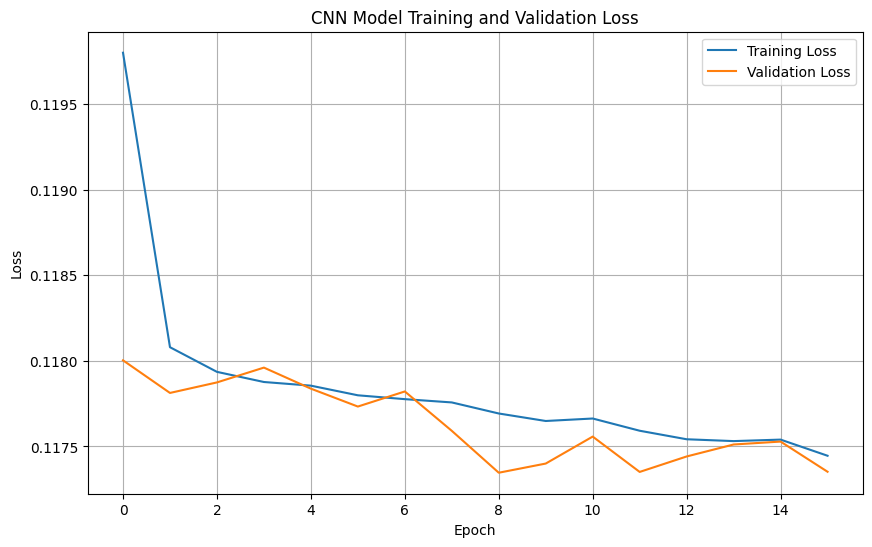

In [26]:
# Plot losses for CNN
if 'history_cnn' in locals():
    plot_losses(history_cnn, 'CNN Model')
else:
  # exception handling
    print("CNN training history not available. Please train the CNN model first.")

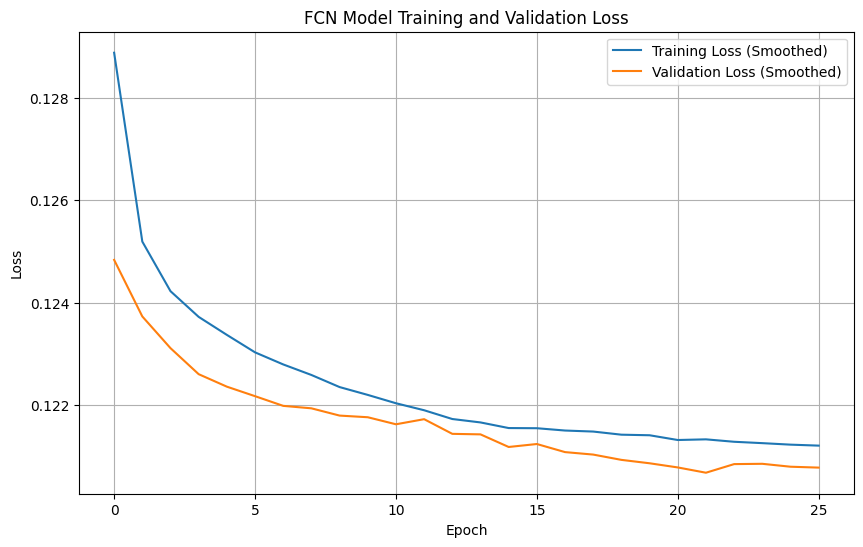

In [24]:
# For FCN Model
if 'history_fcn' in locals():
    plot_losses(history_fcn, 'FCN Model')
    # Plot losses for FCN
else:
    print("FCN training history not available. Please train the FCN model first.")

> **Answer:**

CNN model: Yes, the CNN model converges. The loss decreased and stabilized, indicating that the model learned from the data and reached a point where further training provided diminishing returns on the validation set. The early stopping mechanism correctly identified this and halted training to prevent potential overfitting.

FCN model: Yes, the FCN model converges as the loss decreased and stabilized. However, the slower rate of decrease suggests that the FCN might be struggling more to capture key features and learn the complex patterns required for colorization compared to the CNN.

Overall, CNN performed best.

## **7.2 Running Inference on the Image Colorization Models**

Pass test images through both the **CNN-based model** and the **Fully Connected Network (FCN) model**. Compute the test losses for both models to quantify performance.

```python
def test_model()
  raise NotImplementedError
```

In [27]:
# Now to test both models on the test set
def test_model(model, test_loader, criterion):
    model.eval()
    running_test_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_test_loss += loss.item() * inputs.size(0)

    test_loss = running_test_loss / len(test_loader.dataset)
    print(f'Test Loss: {test_loss:.4f}')

    return test_loss

In [28]:
# For CNN
test_loss_cnn = test_model(trained_model_cnn, test_loader, loss_fn)

Test Loss: 0.0913


In [29]:
# For FCN
test_loss_fcn = test_model(trained_model_fcn, test_loader, loss_fn)

Test Loss: 0.0988


## **8.1 Comparing Test Results**

Select **two different test images** and generate comparison plots.
   - For each test image, create a **2-row, 3-column layout**:
     - **Row 1 (CNN Model)**:  
       - **Grayscale Input**
       - **CNN Colorized Prediction**
       - **Ground Truth RGB Image**
     - **Row 2 (FCN Model)**:  
       - **Grayscale Input**
       - **FCN Colorized Prediction**
       - **Ground Truth RGB Image**

> **Display the loss value below each predicted image.**

```python
def plot_predictions():
  raise NotImplementedError
```

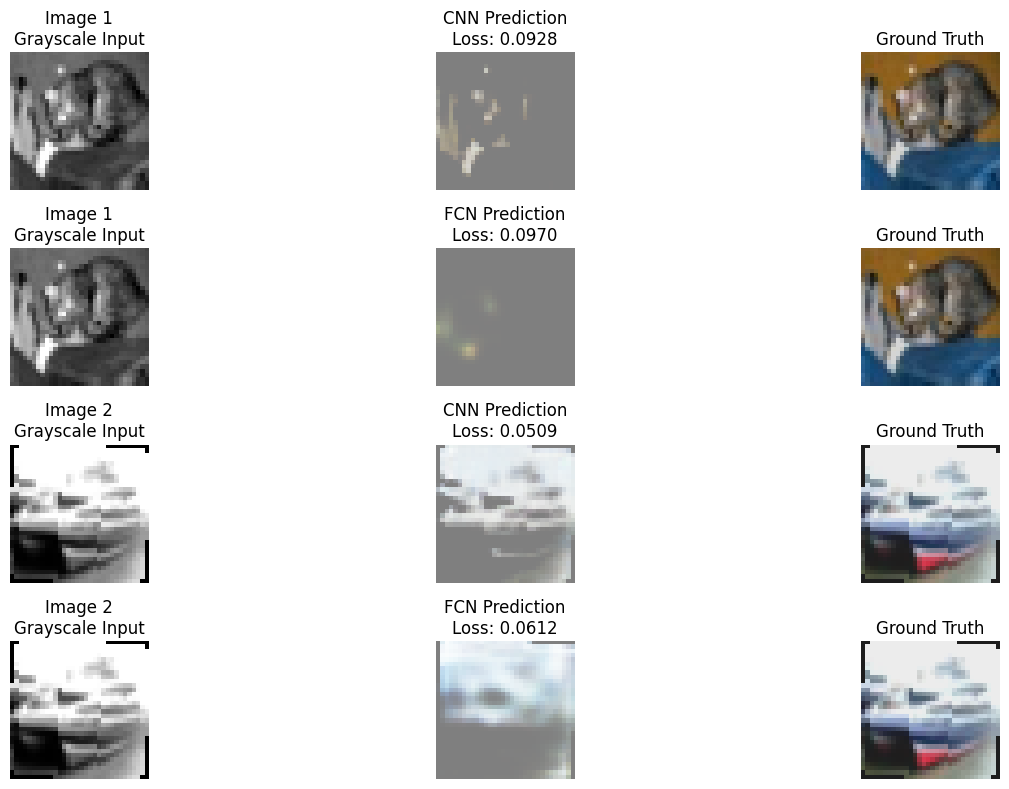

In [30]:
def plot_predictions(num_images_to_plot=2):
    # Get a batch of test data from the test_loader
    # This ensures we get grayscale input and colored target pairs
    grayscale_images_batch, colored_images_batch = next(iter(test_loader))

    # Ensure we display at most num_images_to_plot
    num_images = min(len(grayscale_images_batch), num_images_to_plot)

    # Denormalize function (assuming mean 0.5 and std 0.5 used in transforms)
    def denormalize(tensor):
        return tensor * 0.5 + 0.5

    plt.figure(figsize=(15, num_images * 4)) # Adjust figure height based on number of images

    for i in range(num_images):
        # Get individual image and target from the batch
        grayscale_input = grayscale_images_batch[i].unsqueeze(0).to(device) # Add batch dimension and move to device
        ground_truth = colored_images_batch[i].unsqueeze(0).to(device) # Add batch dimension and move to device

        # Get predictions from CNN
        trained_model_cnn.eval()
        with torch.no_grad():
            cnn_prediction = trained_model_cnn(grayscale_input)
            cnn_loss = loss_fn(cnn_prediction, ground_truth).item()

        # Get predictions from FCN
        trained_model_fcn.eval()
        with torch.no_grad():
            fcn_prediction = trained_model_fcn(grayscale_input)
            fcn_loss = loss_fn(fcn_prediction, ground_truth).item()

        # Plot CNN results (Row for this image)
        # Grayscale Input
        plt.subplot(num_images * 2, 3, (i * 2) * 3 + 1)
        # Remove batch and channel dims for grayscale plotting
        plt.imshow(grayscale_input.squeeze(0).squeeze(0).cpu().numpy(), cmap='gray')
        plt.title(f"Image {i+1}\nGrayscale Input")
        plt.axis("off")

        # CNN Colorized Prediction
        plt.subplot(num_images * 2, 3, (i * 2) * 3 + 2)
        # Remove batch dim, permute dimensions, denormalize, and convert to numpy for RGB plotting
        plt.imshow(denormalize(cnn_prediction.squeeze(0).cpu().permute(1, 2, 0).detach().numpy()))
        plt.title(f"CNN Prediction\nLoss: {cnn_loss:.4f}")
        plt.axis("off")

        # Ground Truth RGB Image
        plt.subplot(num_images * 2, 3, (i * 2) * 3 + 3)
        # Remove batch dim, permute dimensions, denormalize, and convert to numpy for RGB plotting
        plt.imshow(denormalize(ground_truth.squeeze(0).cpu().permute(1, 2, 0).numpy()))
        plt.title("Ground Truth")
        plt.axis("off")

        # Plot FCN results (Row for this image)
        # Grayscale Input (repeat for clarity)
        plt.subplot(num_images * 2, 3, (i * 2 + 1) * 3 + 1)
        # Remove batch and channel dims for grayscale plotting
        plt.imshow(grayscale_input.squeeze(0).squeeze(0).cpu().numpy(), cmap='gray')
        plt.title(f"Image {i+1}\nGrayscale Input")
        plt.axis("off")


        # FCN Colorized Prediction
        plt.subplot(num_images * 2, 3, (i * 2 + 1) * 3 + 2)
        # Remove batch dim, permute dimensions, denormalize, and convert to numpy for RGB plotting
        plt.imshow(denormalize(fcn_prediction.squeeze(0).cpu().permute(1, 2, 0).detach().numpy()))
        plt.title(f"FCN Prediction\nLoss: {fcn_loss:.4f}")
        plt.axis("off")

        # Ground Truth RGB Image (repeat for clarity)
        plt.subplot(num_images * 2, 3, (i * 2 + 1) * 3 + 3)
        # Remove batch dim, permute dimensions, denormalize, and convert to numpy for RGB plotting
        plt.imshow(denormalize(ground_truth.squeeze(0).cpu().permute(1, 2, 0).numpy()))
        plt.title("Ground Truth")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage: plot predictions for 2 test images from a batch
plot_predictions(num_images_to_plot=2)

## **8.2 Explaining the Difference in Performance**  

Examine the differences in both the predicted test images and the computed test losses, providing reasoning for the performance variations between the two models. Provide explanations on how these architectural differences impact both qualitative (visual) and quantitative (loss-based) performance.

> **Answer:**

The CNN model achieved a test loss of 0.0913, while the FCN model had a test loss of 0.0988.
A lower loss indicates better model performance, making the CNN model ideal. It performs better at colorizing the grayscale images on the test set according to the Huber loss metric.


According to the predicted images, we can observe that the CNN predictions appear more visually plausible and have better-defined color regions compared to the FCN predictions. This confirms the test losses accuracy for both models.

## **9.1 Visualizing Feature Maps in the Convolutional Neural Network**

Your goal is to **visualize the feature maps** inside your trained convolutional neural network (CNN). Feature maps show how the network transforms an input image layer by layer.

1. **Create a Hook Function:**  
   - Define a function that will store the feature maps from a given layer during a forward pass.  
2. **Register Hooks to Convolutional Layers:**  
   - Attach this function to **all convolutional layers** in your CNN model to capture their outputs.  
3. **Pass a Sample Image Through the Model:**  
   - Select a grayscale image from the test dataset and feed it into the trained CNN.  
4. **Visualize the Feature Maps:**  
   - For each convolutional layer, **plot its feature maps** (at most **10 feature maps per layer**; if a layer has fewer, visualize all of them).  
   - Include the **layer name** in each plot for clarity.

[Hook Functions](https://pytorch.org/docs/stable/generated/torch.Tensor.register_hook.html)

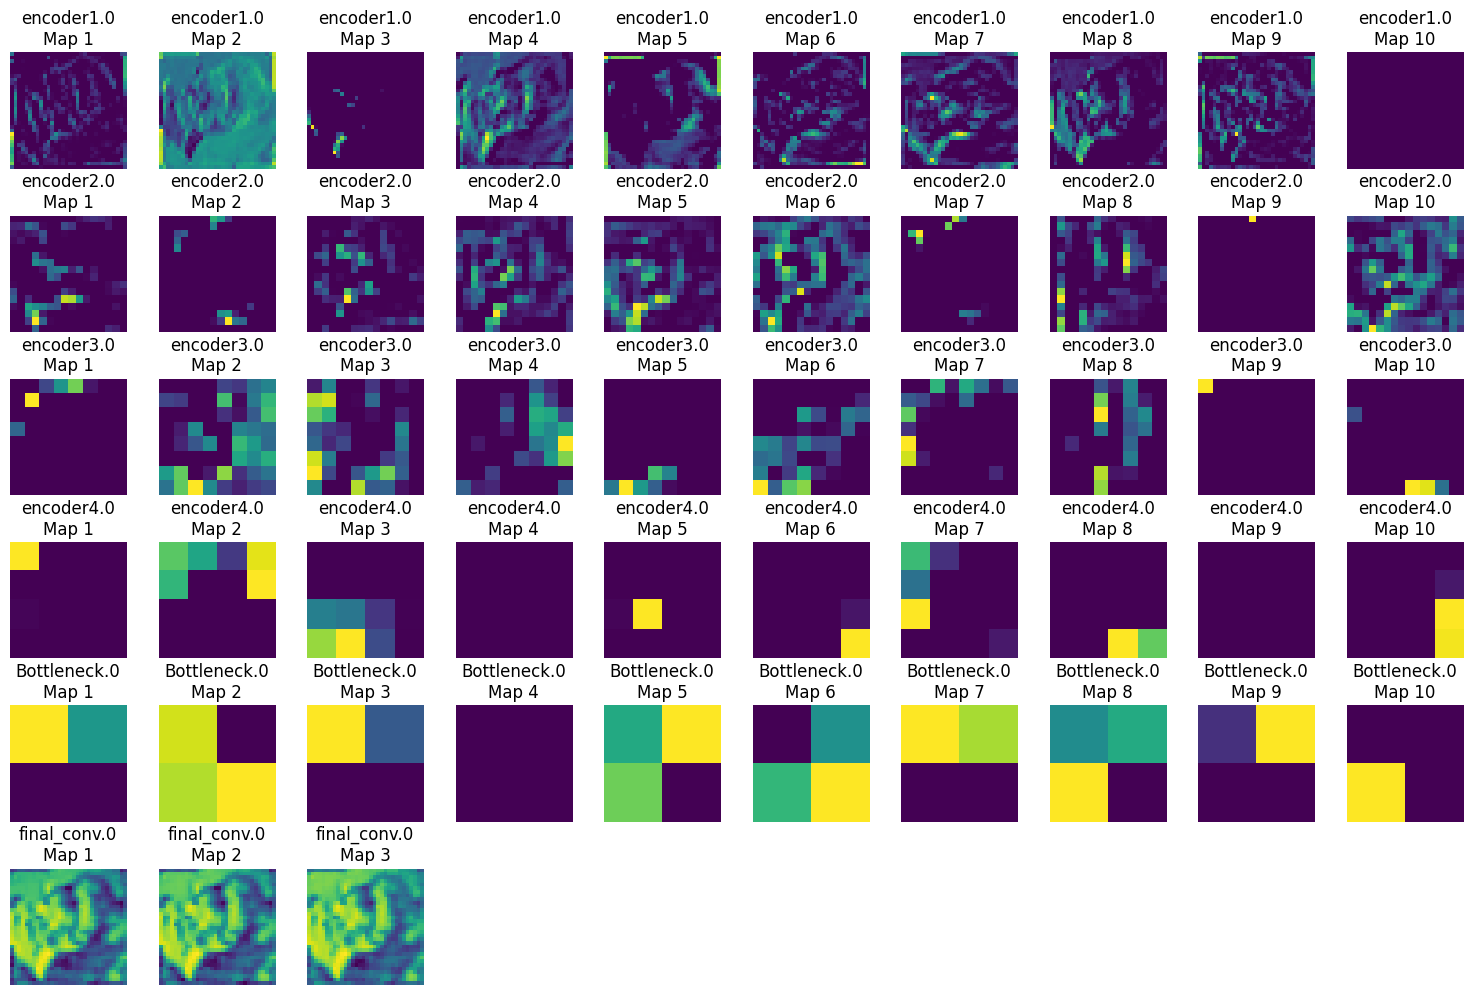

In [31]:
# Create a dictionary to store feature maps
feature_maps = {}

# Hook function to capture feature maps
def get_feature_map(name):
    def hook(model, input, output):
        feature_maps[name] = output.detach()
    return hook

# Register hooks to convolutional layers in the CNN model
hooks = []
for name, layer in trained_model_cnn.named_modules():
    if isinstance(layer, nn.Conv2d):
        hooks.append(layer.register_forward_hook(get_feature_map(name)))

# Select a sample test image (e.g., the first image)
sample_colored_image, _ = test_dataset[0] # Get the original colored image tensor

# Apply Grayscale transform to get a 1-channel image
grayscale_transform = transforms.Grayscale(num_output_channels=1)
sample_grayscale_image = grayscale_transform(sample_colored_image)

sample_grayscale_image = sample_grayscale_image.unsqueeze(0).to(device) # Add batch dimension and move to device

# Pass the sample image through the trained CNN model
trained_model_cnn.eval()
with torch.no_grad():
    _ = trained_model_cnn(sample_grayscale_image)

# Remove the hooks after capturing feature maps
for hook in hooks:
    hook.remove()

# Visualize the feature maps
plt.figure(figsize=(15, 10))
for i, (name, fmap) in enumerate(feature_maps.items()):
    # Squeeze the batch dimension
    fmap = fmap.squeeze(0)

    # Determine the number of feature maps to display (at most 10)
    num_fmaps_to_display = min(fmap.size(0), 10)

    for j in range(num_fmaps_to_display):
        plt.subplot(len(feature_maps), 10, i * 10 + j + 1)
        plt.imshow(fmap[j].cpu().numpy(), cmap='viridis') # Use a colormap for visualization
        plt.title(f"{name}\nMap {j+1}")
        plt.axis("off")

plt.tight_layout()
plt.show()

## **9.2 Visualizing Weights in the Fully Connected Network**  

In this task, you will explore what the first layer of your **fully connected neural network (FCN)** learns when colorizing grayscale images. Since the first linear layer directly maps grayscale pixels to hidden features, we can **reshape and visualize its weights** to understand what patterns the model is detecting.

1. **Extract the weights** of the first fully connected layer (`e.g. fc1`) from the trained linear model.  
2. **Select a few neurons** (e.g., 5-10) and reshape their weights into $32 \times 32$ images.  
3. **Plot these weights as grayscale images** using Matplotlib with a chosen colormap.

Each neuron in `e.g. fc1` has **1024 weights** (since $ 32 \times 32 = 1024 $), meaning **each neuron "sees" the entire grayscale image**. By reshaping these **1024 weights** back into $ 32 \times 32 $, we get an image representation of **what each neuron is learning**. If the model has learned useful features, you should see structured patterns, like **edges or textures**.

[The `weight` variable](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)

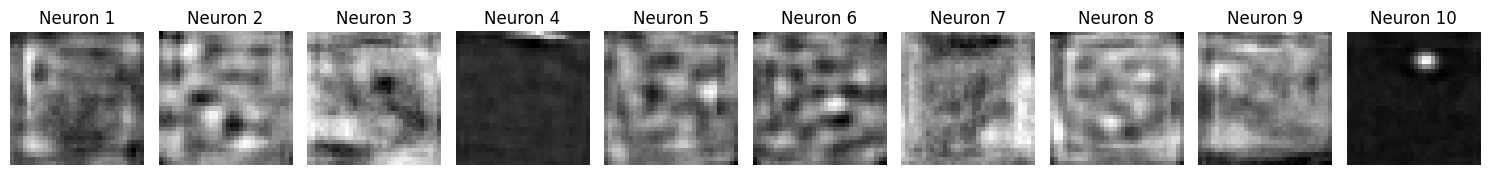

In [32]:
# Extract the weights of the first linear layer from the FCN model
# Assuming the first linear layer is the first module in the Sequential
# .fc is the Sequential module defined in the ColorizationLinear class
# [0] accesses the first layer within the Sequential, which is the first nn.Linear layer
first_linear_layer = trained_model_fcn.fc[0]
# .weight accesses the weight tensor of the linear layer
# .data gets the raw tensor data
# .cpu() moves the tensor to the CPU for numpy conversion and plotting
weights = first_linear_layer.weight.data.cpu()

# Reshape weights into images and visualize
# Determine the number of neurons to visualize (at most 10, or fewer if the layer has less)
num_neurons_to_visualize = min(weights.size(0), 10)

# Create a figure to display the weight images
plt.figure(figsize=(15, 3))

# Iterate through the selected number of neurons
for i in range(num_neurons_to_visualize):
    # Create a subplot for each neuron's weight visualization
    plt.subplot(1, num_neurons_to_visualize, i + 1)
    # Reshape the weights for this neuron into a 32x32 image
    # Each neuron's weights correspond to the flattened input (1*32*32 = 1024)
    neuron_weights_image = weights[i].view(32, 32).numpy()
    # Display the weight image using a grayscale colormap
    plt.imshow(neuron_weights_image, cmap='gray')
    # Set the title for each subplot
    plt.title(f"Neuron {i+1}")
    # Turn off the axis for cleaner visualization
    plt.axis("off")

# Adjust layout to prevent titles/images from overlapping
plt.tight_layout()
# Display the plot
plt.show()

Please make sure to download your `.ipynb` file, and upload it to **Canvas** on time!

<img src="https://www.usatoday.com/gcdn/authoring/authoring-images/2023/08/25/USAT/70680172007-alertsm.png?crop=2099,1187,x0,y156" alt="1" border="0">



In [ ]:
# @title ⏰ Time Left Until Submission ⏰
# %%capture flowchart_output
# HIDDEN CELL

from datetime import datetime, timedelta

deadline = datetime(2025, 10, 21, 23, 59, 0)

def time_until_deadline():
    now = datetime.utcnow()
    remaining = deadline - now
    if remaining.total_seconds() <= 0:
        return "Time's up!"
    days = remaining.days
    hours, remainder = divmod(remaining.seconds, 3600)
    minutes, _ = divmod(remainder, 60)

    return f"{days} days, {hours} hours, {minutes} minutes"

print("Time left until submission:", time_until_deadline())